# Removing outliers in Pandas

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
from pandas import Series, DataFrame
import pandas as pd

## Example Dataset
Create a DataFrame with a number of normally distributed data. 

In [2]:
df=pd.DataFrame({'Data':np.random.normal(size=200)})  

Check the mean and std values of the samples

In [5]:
df.describe()

,Data
count,200.000000
mean,-0.061158
std,1.055672
min,-4.031877
25%,-0.793353
50%,-0.166457
75%,0.700322
max,2.589385


## Plot raw data

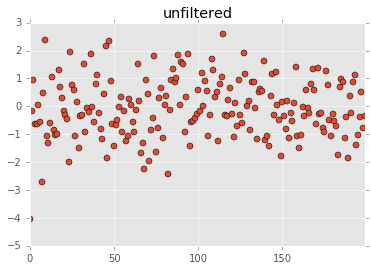

In [25]:
df.Data.plot(style="o",title='unfiltered')

## Filter data
Cut off outliers - in this example set to 1 time the standard deviation to make things clear. In more normal situations you might want to consider another number, for example 3 times the std. 

Check the reduced number of samples and the different mean value below.

In [44]:
df1=df[((df.Data - df.Data.mean()) / df.Data.std()).abs() < 1]
df1.describe()

,Data,filtered
count,140.000000,140.000000
mean,-0.108327,-0.108327
std,0.602877,0.602877
min,-1.085946,-1.085946
25%,-0.560873,-0.560873
50%,-0.181558,-0.181558
75%,0.366485,0.366485
max,0.981316,0.981316


## Plot filtered data
Make sure to maintain same y axis - otherwise the plot will be zoomed in on the new Y range.

(-5, 3)

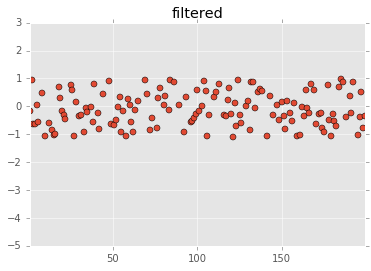

In [26]:
df1.Data.plot(style='o',title='filtered')
plt.ylim(-5,3)

## Plot both raw and filtered
Add another column in the DataFrame with the filtered data and plot them together. Note the undocumented $markersize$ parameter in action here ^_^

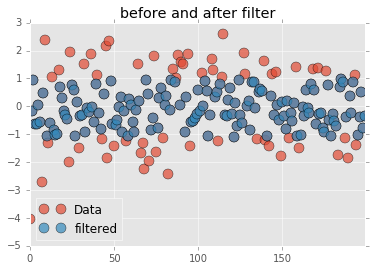

In [45]:
df['filtered']=df[((df.Data - df.Data.mean()) / df.Data.std()).abs() < 1]
df.plot(style='o',title='before and after filter', markersize=10, alpha=.7)

In [47]:
df.head()

,Data,filtered
0,-4.031877,NaN
1,-0.164543,-0.164543
2,0.956685,0.956685
3,-0.631557,-0.631557
4,-0.651669,-0.651669
